# A/B Testing

**A/B test** is a statistical experiment which you compare **two versions** of something such as a new data science feature, product, etc.

So that you can define if a new version is better than the current one, you need to define a **(primary) metric**.<br>
However, a **(Business) hypothesis** must be defined - this should focus on improving/"fixing" <br>a potential issue in the product or a new solution that will influence the **KPI** (**Key-Performace-Indicator**).

You have to define a **null hypothesis** ($H_0$) and an **alternative hypothesis** ($H_a$). The following example depicts a scenario in a retail company:
- $H_0$: Conversion rates are **equal** between mobile and desktop.
- $H_a$: Conversion rates are **NOT equal** between mobile and desktop.

The idea is to **randomly select users** and assign them into **two groups**:
- **Control**: this shows the original/current version (e.g. feature, webpage, etc.).
- **Treatment**: sees the new version.

One of the frequent questions is **how many data sample do I need?**<br>
We use **Power Analysis** to calculate the minimum sample size.

In summary, the **Power Analysis** makes assumption of model parameters: **Power of Test**, **Significance Level**, and **Minimum Detectable Effect**. You can pick one of the online calculators to define the minimum sample size. 

**Power analysis** parameters:
- $\beta$: probability of type II error (i.e., common to pick 80%).
- (1-$\beta$): power of the test.
- $\alpha$: probability of Type I error - Significance Level (i.e., common to pick 5%).
- $\delta$: Minimum Detectable Effect.

**Type of errors**:
- I: Reject $H_0$, when it's *True* - This is a **False Positive (FP)**.
- II Accept $H_0$,, when it's *False* - This is a **False Negative (FN)**.

Also, the **duration of the test** is determined by the problem we want to analyze. Let's assume that we want to run an A/B test for an e-commerce, and we evaluate a new features related to visitors/customer in our page. A formular to calculate the duration is defined as follows:

$duration = \frac{N}{num visitors per days}$, <br><br>where $N$ is the **minimum sample size**, and it's defined using the **Power Analysis**.

Note that **we can't stop the experiment earlier** (i.e. novelty effect) or if we achieve a statistical significance before the end of the experiment (i.e. frequently called *p-hacking*), <br>or even let it running more days than the one defined by the above formular (i.e. this might cause **maturation effects**).

### Analyzing A/B tests results

Once we have defined the test, ran it, and collect the data. We are ready to analyze the test results. <br>
Therefore, we choose an appropriate statistical test. I'm going to summarize a few tests below:

- **t-test**: compares means between two groups.
- **z-test**: compares means and proportions between two large groups.
- **Chi-square**: tests for association between categorical variables.
- **ANOVA**: compares means across 3+ groups.


### Cases

Define hypothesis tests and implement the tests in Python.

#### Case 01: Conversion rate

**Hypothesis**: A new product detail page layout increases the add-to-cart conversion rate.

1. Defining hypothesis:
    - $H_0$: the new layout has **no effect** on conversion.
    - $H_a$: the new layout **increases** conversion.

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming we have a minimum sample 10000 visitors
# Each groups should have 5000 visitor
# Control conversion rate is 10%
# Treatment conversion rate is 15%

# Parameters:
min_sample_size = 10000
control_conv_rate = 0.1
treatment_conv_rate = 0.15

# Groups
control = np.random.binomial(
    n=1, p=control_conv_rate, size=int(min_sample_size/2))
treatment = np.random.binomial(
    n=1, p=treatment_conv_rate, size=int(min_sample_size/2))

# (optional) create a Pandas DataFrame
c1_df = pd.DataFrame({
    "group": len(control) * ["Control"] + len(treatment) * ["Treatment"],
    "converted": np.concatenate([control, treatment])
})
summary_c1 = c1_df.groupby("group")["converted"].agg(["mean", "count", "sum"])
summary_c1["conversion_rate"] = summary_c1["sum"] / summary_c1["count"]
display(summary_c1)

# Using z-test for proportions
# We have a large dataset (>30 points)
# 'Std' of the population is not know, but since we have a large sample,
#   we can have a good approximation.
successes = np.array([control.sum(), treatment.sum()])
nobs = np.array([len(control), len(treatment)])
z_stat, p_val = sm.stats.proportions_ztest(
    count=successes, nobs=nobs, alternative="smaller")

alpha = 0.05
if p_val <= alpha:
    print("Reject null hyphotesis (H0) :: "+
            "There's a statistically difference in conversion rates.\n")
else:
    print("Fail to reject the null hypothesis (H0) :: "+
            "There's not difference in conversion rates.\n")

,mean,count,sum,conversion_rate
group,,,,
Control,0.1086,5000,543,0.1086
Treatment,0.1538,5000,769,0.1538


Reject null hyphotesis (H0) :: There's a statistically difference in conversion rates.



**[Remarks]** 
- I use *smaller* in the proportions_ztest because I expect treatment > control.

#### Case 02: App vs Website Revenue

**Hypothesis**: is the average revenue per user (ARPU) higher for mobile app users than website users?

1. Defining hypothesis:
    - $H_0$: there's **no difference** between mobile and desktop.
    - $H_a$: there's a **different** in ARPU between mobile and desktop.

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
app,450.0,44.84,8.81,17.33,39.29,44.81,50.70,73.68
website,450.0,41.89,9.96,5.77,35.83,41.79,48.38,66.61


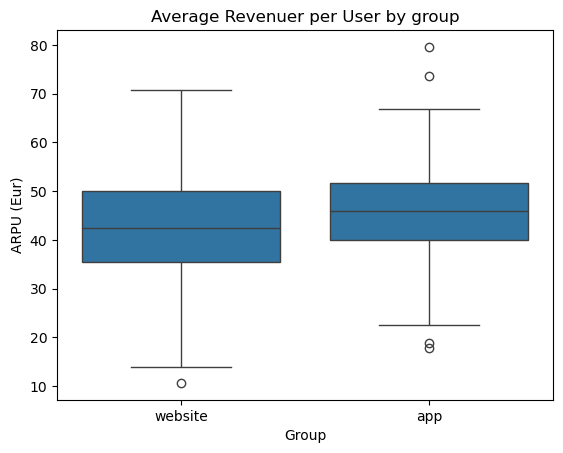

T-Statistics: -4.71
P-val: 2.84e-06

Reject null hypothesis (H0) :: This means that there's a difference in the ARPU.



In [113]:
import seaborn as sns
from scipy.stats import ttest_ind

# Control = website
# Treatment = app

# Parameters
n_size = 900
n_c = int(n_size/2)
n_t = int(n_size/2)
c_mean = 42
t_mean = 45
c_std = 10
t_std = 9

# Revenue in Euros
control = np.random.normal(loc=c_mean, scale=c_std, size=n_c)
treatment = np.random.normal(loc=t_mean, scale=t_std, size=n_t)

summary_c2 = pd.DataFrame({
    "group": n_c*["website"] + n_t*["app"],
    "arpu": np.concatenate([control, treatment])
})
summary_c2 = summary_c2.groupby("group")["arpu"].describe().round(2)
display(summary_c2)

sns.boxplot(x="group", y="arpu", data=df2)
plt.title("Average Revenuer per User by group")
plt.xlabel("Group")
plt.ylabel("ARPU (Eur)")
plt.show()

t_stat, p_val = ttest_ind(control, treatment)
print(f"T-Statistics: {t_stat:.3}")
print(f"P-val: {p_val:.4}\n")

alpha = 0.05
if p_val <= alpha:
    print(f"Reject null hypothesis (H0) :: "+
          f"This means that there's a difference in the ARPU.\n")
else:
    print(f"Fail reject null hypothesis (H0) :: "+
          f"This means that there's NO difference in the ARPU.\n")

...

*What if we want to know the **confidence interval (CI)** for the difference between the means of the two groups?*

In summary, **CI** is range of values that we are sure out **true value** lies in.

For the 95% CI is calculated as: <br>
$CI = mean \;\; difference \pm 1.96 * SE$, where:
- 1.96 comes from the *z-distribution* for 95% CI.

**SE** means **standard error**, and it quantifies **how much variation we would expect in the mean difference** if we repeated the experiment.<br>
For two sided independent samples, we calculate the SE as follows: <br>

$SE = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$, where:
- $\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}$: variances of control and test
- $n_1,n_2$: sample size of control and treatment


If the CI doesn’t contain 0, it supports the idea that the difference is statistically significant. <br>
For instance:
- (0.15%, 0.55%) → Positive difference, likely significant
- (-0.02%, 0.30%) → Might not be significant

Let's take the above case, and compute the CI.

In [152]:
# CI for Case 2

diff_mean = np.mean(treatment) - np.mean(control)
se = np.sqrt( (np.var(treatment)/n_t) + 
              (np.var(control)/n_c) )

ci_low, ci_high = diff_mean - 1.96*se, diff_mean + 1.96*se

print(f"Difference mean: {diff_mean:.2f} Euros")
print(f"95% Confidence interval: {ci_low:.2f} Eur and {ci_high:.2f} Eur")

Difference mean: 2.95 Euros
95% Confidence interval: 1.73 Eur and 4.18 Eur


**[Remarks]**
- The **app generates €2.95 more on average per user** than the website, with high confidence that the true **difference lies between €1.73 and €4.18**.
- **Business Insight**: App users may be more engaged (push notifications, smoother checkout). This supports prioritizing app user experience or incentivizing app installs.

___